[View in Colaboratory](https://colab.research.google.com/github/himu30/Machine_learning_with_python/blob/master/assisgnment_12.ipynb)

# Assignment - Accuracy and Metrics

In [11]:
!pip install --upgrade lxml

Requirement already up-to-date: lxml in /usr/local/lib/python3.6/dist-packages (4.2.1)


**Q-1.)**

In [15]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from lxml import etree

#importing the dataset
url = 'http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html'
data = pd.read_html(url)

print(data)

[                   0              1
0            Classes             10
1  Samples per class           ~180
2      Samples total           1797
3     Dimensionality             64
4           Features  integers 0-16,              0                                                  1
0  Parameters:  n_class : integer, between 0 and 10, optional ...
1     Returns:  data : Bunch Dictionary-like object, the inter...]


In [13]:
from sklearn.datasets import load_digits

digit = load_digits()
#shape of loaded dataset(image data shape)
digit.data.shape

(1797, 64)

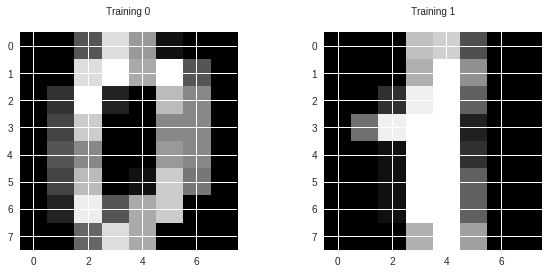

In [24]:
#label datashape
digit.target.shape

#look of image in digit dataset
plt.figure(figsize = (10,4))
for index, (image,label) in enumerate(zip(digit.data[0:2], digit.target[0:2])):
  plt.subplot(1, 2, index+1)
  plt.imshow(np.reshape(image ,(8,8)), cmap=plt.cm.gray)
  plt.title('Training %i\n'%label,fontsize = 10)

  #This is referenced from past lectures notes

In [26]:
type(digit.data)

type(digit.target)

numpy.ndarray

**Q-4.)** and **Q-3.)**

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(digit.data , digit.target, test_size=0.30 , random_state=20)

#importing logistic Regression model
from sklearn.linear_model import LogisticRegression

#initialise it to a variable
l_reg = LogisticRegression()

#now training of model on given dataset
l_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
#prediction part 
prediction = l_reg.predict(x_test)
prediction

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 3, 1, 8, 1, 3, 7, 8,
       4, 6, 1, 0, 1, 0, 5, 4, 7, 1, 6, 7, 8, 4, 3, 7, 4, 0, 5, 9, 0, 4,
       8, 7, 4, 3, 6, 3, 9, 2, 2, 5, 7, 3, 7, 8, 3, 8, 6, 6, 8, 6, 8, 5,
       0, 5, 3, 5, 0, 7, 3, 2, 9, 9, 3, 0, 2, 5, 5, 9, 2, 4, 5, 9, 7, 7,
       2, 3, 0, 4, 6, 1, 1, 7, 1, 9, 9, 3, 4, 6, 7, 8, 1, 8, 4, 0, 1, 3,
       6, 1, 5, 5, 1, 6, 0, 6, 2, 8, 9, 4, 1, 3, 4, 0, 6, 7, 7, 9, 8, 7,
       8, 2, 4, 2, 5, 2, 3, 8, 7, 9, 8, 0, 0, 6, 2, 6, 9, 0, 9, 0, 0, 8,
       7, 5, 3, 4, 0, 5, 6, 2, 6, 0, 4, 8, 7, 9, 2, 4, 3, 6, 4, 4, 5, 2,
       8, 0, 7, 7, 3, 2, 2, 9, 0, 7, 2, 1, 6, 7, 9, 1, 5, 1, 6, 4, 6, 1,
       3, 6, 1, 0, 8, 6, 5, 8, 8, 9, 1, 5, 1, 2, 6, 7, 5, 0, 1, 2, 4, 7,
       0, 9, 6, 4, 7, 6, 5, 1, 2, 5, 5, 4, 6, 1, 7, 6, 1, 8, 9, 6, 2, 8,
       5, 8, 3, 3, 9, 0, 3, 7, 9, 9, 1, 7, 0, 0, 5, 7, 3, 6, 3, 8, 6, 3,
       6, 9, 8, 3, 3, 4, 4, 0, 7, 1, 5, 6, 1, 4, 6, 4, 9, 6, 3, 7, 4, 5,
       2, 5, 6, 4, 0, 4, 2, 2, 3, 3, 2, 9, 0, 9, 7,

In [41]:
#model performance
l_reg.score(x_test , y_test)

0.9685185185185186

**Q-5** *Classification Metrics*

part a.) **Classification matrix**

In [45]:
#Classification accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)


0.9685185185185186

part f.) **Confusion matrix**

In [47]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)


array([[50,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 59,  0,  1,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 59,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 49,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  1, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  2],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 48,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 51]])

part b.) **Logarithmic loss**

In [54]:
#logarithmic loss
from sklearn.metrics import log_loss
pred = l_reg.predict_proba(x_test)
log_loss(y_test , pred, labels=[0,1,2,3,4,5,6,7,8,9])

0.18973455400842026

part e.) **Mean_Squared_error**

In [49]:
#mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test , prediction)

0.6462962962962963

part d.)** Mean_absolute_error**

In [50]:
#Mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test , prediction )

0.12407407407407407

part c.)** R^2 Metrics**

In [55]:
#r2 metrics
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.918778829399771

part g.) **Classification report**

In [56]:
# Classification report
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00        50\n          1       0.90      0.98      0.94        56\n          2       1.00      1.00      1.00        44\n          3       0.98      0.94      0.96        63\n          4       0.98      0.98      0.98        60\n          5       0.96      0.96      0.96        51\n          6       1.00      0.97      0.98        59\n          7       0.98      0.96      0.97        53\n          8       0.94      0.92      0.93        52\n          9       0.94      0.98      0.96        52\n\navg / total       0.97      0.97      0.97       540\n'